In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import sklearn as skl


In [3]:
stroke_train_df = pd.read_csv('Resources/stroke_training_ActualDataSample.csv')
stroke_train_df

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.019043,0.125947,0.058752,0,0,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
1,0.951172,0.628626,0.173807,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0.511719,0.037179,0.204406,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0.536133,0.131027,0.168911,1,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0.609375,0.697534,0.527540,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.975586,0.042583,0.424725,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,1
362,0.987793,0.604979,0.228886,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
363,0.816895,0.801173,0.321909,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
364,0.829102,0.778727,0.264382,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1


In [4]:
stroke_test_df = pd.read_csv('Resources/stroke_testing_data.csv')
stroke_test_df
stroke_test_df.nunique()

age                                 99
avg_glucose_level                 1154
bmi                                315
hypertension                         2
heart_disease                        2
gender_Female                        2
gender_Male                          2
gender_Other                         1
ever_married_No                      2
ever_married_Yes                     2
work_type_Govt_job                   2
work_type_Never_worked               2
work_type_Private                    2
work_type_Self-employed              2
work_type_children                   2
Residence_type_Rural                 2
Residence_type_Urban                 2
smoking_status_Unknown               2
smoking_status_formerly smoked       2
smoking_status_never smoked          2
smoking_status_smokes                2
stroke                               2
dtype: int64

In [21]:
y_train = stroke_train_df['stroke'].values
X_train = stroke_train_df[['age','avg_glucose_level','bmi','hypertension','heart_disease','gender_Female','gender_Male']].values
y_test = stroke_test_df['stroke'].values
X_test = stroke_test_df[['age','avg_glucose_level','bmi','hypertension','heart_disease','gender_Female','gender_Male']].values

In [22]:
X_test

array([[0.87792969, 0.22182708, 0.20318237, ..., 0.        , 1.        ,
        0.        ],
       [0.54833984, 0.43381674, 0.28396573, ..., 0.        , 1.        ,
        0.        ],
       [0.89013672, 0.07421947, 0.33537332, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.89013672, 0.30763902, 0.24479804, ..., 0.        , 0.        ,
        1.        ],
       [0.76806641, 0.2323111 , 0.3378213 , ..., 0.        , 0.        ,
        1.        ],
       [0.15771484, 0.20446148, 0.16034272, ..., 0.        , 1.        ,
        0.        ]])

In [23]:
#define neural network model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 22
hidden_nodes_layer2 = 11
hidden_nodes_layer3 = 5
nn_model = tf.keras.models.Sequential()

#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

#Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation='relu'))

#Third hidden layer
#nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

#output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#check structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 22)                176       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                253       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [25]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [26]:
#Compile the model
nn_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [27]:
#Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
12/12 [==============================] - 0s 910us/step - loss: 0.6989 - accuracy: 0.4044

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.6421

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6667

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6667

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6721

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.6776

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/50
12/12 [==============================] - 0s 1ms/ste

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 0.4521 - accuracy: 0.7622
Loss: 0.4521328806877136, Accuracy: 0.7622149586677551


In [29]:
predictions = nn_model.predict(X_test)

In [30]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [33]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(asix=1)[:, mp.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['No Stroke','Stroke']

Confusion matrix, without normalization
[[1176    0]
 [  52    0]]


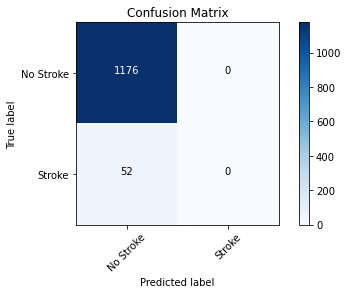

In [34]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')